(60000, 28, 28)
Number of training dataset and labels = 60000 & 60000
Number of test dataset and labels = 10000 & 10000
Dimensions of training/test images and labels = 28 * 28


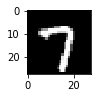

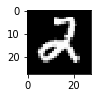

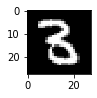

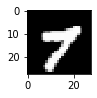

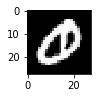

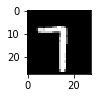

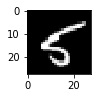

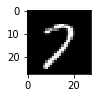

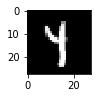

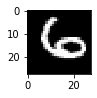

(60000, 28, 28, 1)
(10000, 10)


In [16]:
#import dataset(MNIST)
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(xtrain,ytrain),(xtest,ytest)=mnist.load_data();
print(xtrain.shape)

print("==============================================================")
print("Number of training dataset and labels =",xtrain.shape[0],"&", ytrain.shape[0])
print("Number of test dataset and labels =",ytest.shape[0],"&", ytest.shape[0])
print("Dimensions of training/test images and labels =",xtrain.shape[1],"*", xtrain.shape[1])
print("==============================================================")

#Visualize input/training data randomly

c=330
for i in range(0,10):
    randNumber=np.random.randint(0,xtrain.shape[0])
    windowName="sample number"+str(randNumber)
    cv.imshow(windowName,xtrain[randNumber])
    cv.waitKey(0)
cv.destroyAllWindows()

for i in range(0,10):
    randNumber=np.random.randint(0,xtrain.shape[0])
    plt.subplot(c+1)
    plt.imshow(xtrain[randNumber],cmap=plt.get_cmap('gray'))
    plt.show()

#reshaping datasets

#########################################################################
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2],1)
print(xtrain.shape)

xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

xtrain/=255
xtest/=255
#########################################################################
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)
print(ytest.shape)


In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k
from keras.optimizers import SGD

input_shape=(xtrain.shape[1],xtrain.shape[2],1)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(ytrain.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

print(model.summary())
########################################################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

In [20]:
print("Training the model")
epochs=6
batch_size=32
history=model.fit(xtrain,ytrain,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=0)
print(score)
model.save('mnist_batch_32_epoch_6.h5')

Training the model
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 201s 3ms/step - loss: 0.4112 - acc: 0.8726 - val_loss: 0.1868 - val_acc: 0.9453
Epoch 2/6
60000/60000 [==============================] - 188s 3ms/step - loss: 0.2681 - acc: 0.9196 - val_loss: 0.1272 - val_acc: 0.9627
Epoch 3/6
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1971 - acc: 0.9417 - val_loss: 0.0915 - val_acc: 0.9739
Epoch 4/6
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1564 - acc: 0.9533 - val_loss: 0.0723 - val_acc: 0.9779
Epoch 5/6
60000/60000 [==============================] - 186s 3ms/step - loss: 0.1304 - acc: 0.9619 - val_loss: 0.0612 - val_acc: 0.9806
Epoch 6/6
60000/60000 [==============================] - 188s 3ms/step - loss: 0.1149 - acc: 0.9660 - val_loss: 0.0591 - val_acc: 0.9811
[0.059082170736417174, 0.9811]


In [23]:
############Testing out data###########
from keras.models import load_model
digit_classifier=load_model('mnist_batch_32_epoch_6.h5')
import cv2
import numpy as np

windowName="digit classifier"
for i in range(1,10):
    val=np.random.randint(0,len(xtest))
    inp_img=xtest[val]
    out_img=cv2.resize(inp_img,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    inp_img=inp_img.reshape(1,xtest.shape[1],xtest.shape[1],1)
    pred_val=str(digit_classifier.predict_classes(inp_img,1,verbose=0)[0])
    j=0
    while ytest[val][j]!=1.0:
        j+=1
        
        
    print("Predicted result :",pred_val ,"       ","actual result :",j)
    print("----------------------------------------------------------------------------------")
    cv2.imshow(windowName,xtest[val])
    cv2.waitKey(0);
cv2.destroyAllWindows()



Predicted result : 8         actual result : 8
----------------------------------------------------------------------------------
Predicted result : 8         actual result : 8
----------------------------------------------------------------------------------
Predicted result : 9         actual result : 9
----------------------------------------------------------------------------------
Predicted result : 6         actual result : 6
----------------------------------------------------------------------------------
Predicted result : 7         actual result : 7
----------------------------------------------------------------------------------
Predicted result : 4         actual result : 4
----------------------------------------------------------------------------------
Predicted result : 4         actual result : 4
----------------------------------------------------------------------------------
Predicted result : 0         actual result : 0
-------------------------------------------